
![Amberd](amberd.jpg)
### Presentation Slides
[Slides are attached here](https://docs.google.com/presentation/d/1MH4TJ5kkJuynZO20Fd7AOKGhWU8_DrCuxO21IeUrUzo/edit#slide=id.gc6f59039d_0_29)

## Welcome to Simple Linear Regression!!
In this notebook we will explore the fundamentals of constructing a simple linear regression model using Health data and understand how we can analyze and utilize this model for prediction. 

In [46]:
!pip install statsmodels==0.12.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [47]:
# EDA and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [48]:
health = pd.read_csv("health.csv")

In [49]:
health.head()

,Unnamed: 0,Casenr,Age,Gender,Ethnicity,Education,RFFT,VAT,CVD,DM,...,Solubility,Days,Years,DDD,FRS,PS,PSquint,GRS,Match_1,Match_2
0,2266,2266,55,1,3,2,62,-1,0,1,...,2,-1,-1.000000,0.0,8,0.374275,5,1,816,113
1,3235,3235,65,1,0,1,79,11,0,0,...,1,1672,4.580822,1373.0,11,0.255946,4,1,727,242
2,1068,1068,46,0,2,3,89,6,0,0,...,2,-1,-1.000000,0.0,-1,0.128504,3,0,-1,-1
3,3422,3422,68,1,0,2,70,5,0,0,...,2,-1,-1.000000,0.0,9,0.094176,2,0,838,-1
4,3570,3570,70,0,0,2,35,10,0,0,...,2,-1,-1.000000,0.0,12,0.193432,4,1,-1,276


## Goal: 
- Analyze the correlation between Cholesterol and other numeric variables
- Create a model to predict Cholesterol based on another variable 

##### Step: choose numeric columns

In [50]:
health = health[["Age", "RFFT", "BMI", "Chol", "HDL"]]

In [51]:
health.head()

,Age,RFFT,BMI,Chol,HDL
0,55,62,39.669421,3.86,1.54
1,65,79,28.981143,5.64,1.53
2,46,89,23.233456,6.83,1.04
3,68,70,22.343516,7.11,1.85
4,70,35,32.410037,5.04,1.40


#### step: create scatterplots of Chol with other variables 

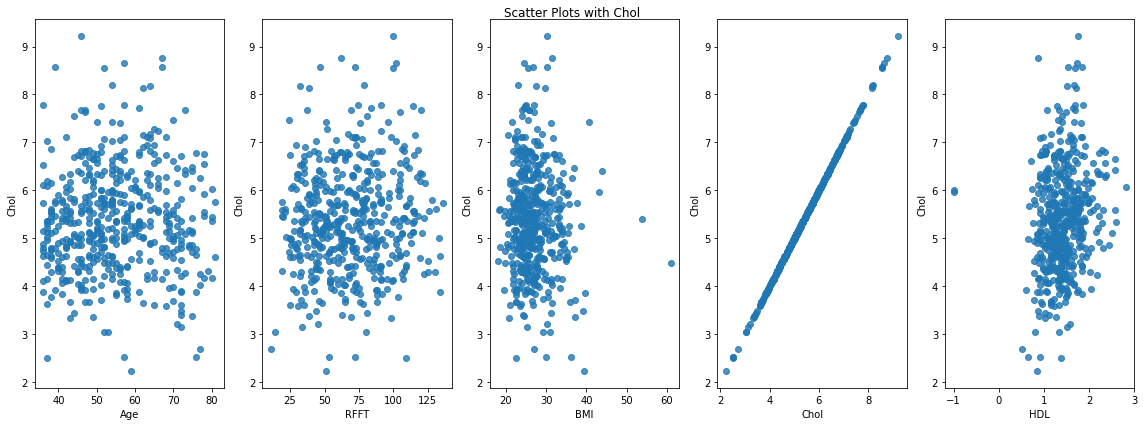

In [52]:
fig, ax = plt.subplots(1, 5, figsize=(16,6))

for i,col in enumerate(health[1:]):
     sns.regplot(x=health[col], y=health["Chol"], ax=ax[i], fit_reg = False)

fig.suptitle('Scatter Plots with Chol')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()


#### Goal: find the line of "best fit", i.e. a line that on average best represents the given data 

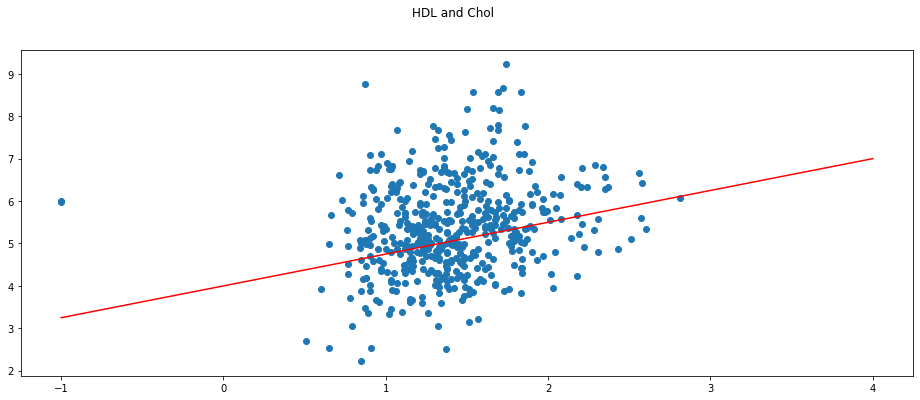

In [57]:
col = "HDL"
fig, ax = plt.subplots(figsize=(16,6))
plt.scatter(x=health[col], y=health["Chol"])
fig.suptitle('HDL and Chol')

x = np.arange(-1, 5, 1)
slope = 0.75
intercept = 4 
y = slope * x + intercept
plt.plot(x,y, color = "red")

##### This line can serve as our predictions line. But how do we know how good is our line?  

### Error Term (Residual) 
After we choose a line, each x will have one predicted value and an actual observed value. The difference between these two is called the error term. 

In [58]:
x = 1
predicted = slope * x + intercept 
print("Predicted =", predicted)
observed = health[health["HDL"] == 1]

Predicted = 4.75


In [59]:
observed

,Age,RFFT,BMI,Chol,HDL
84,45,46,24.251278,4.86,1.0
425,55,100,27.922687,5.34,1.0


In [60]:
errors = predicted - observed["Chol"] 
errors

84    -0.11
425   -0.59
Name: Chol, dtype: float64

##### Doing this for each x and adding it together gives us the total error of our model. Then, we just need to find the line which minimizes this error. 

##### Problem: some errors are negative and some are positive. If we add them up they will cancel each other and make it seem like there is no error. How can we fix this? 

#### Solution: Mean Squared Error (MSE)
![MSE](Mean-Squared-Error-formula-used-to-evaluate-the-user-model.png)


![Wrong but Useful](models_are_wrong.jpg)

### Building the model with SkLearn Library
##### Step 1: Split dataset into train and test sets 


In [27]:
X = health[["HDL"]]
y = health["Chol"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Step 2: train the model using the training set

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


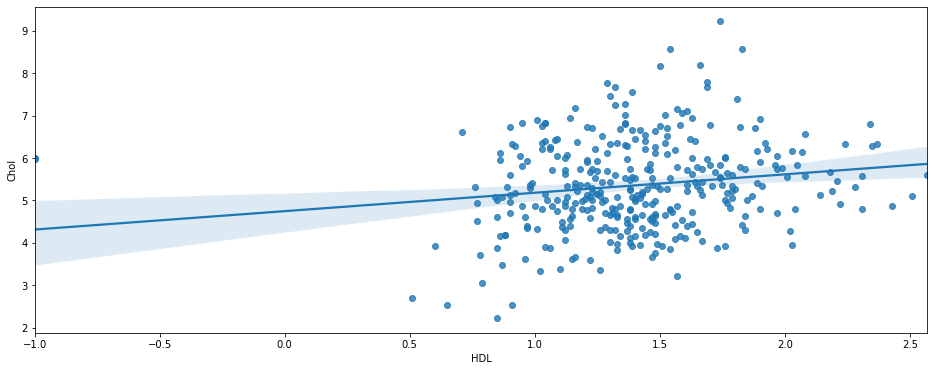

regression intercept: 4.7481166026466175
regression slope: [0.4337869]
prediceted interseot: 4
prediceted slope: 0.75


In [61]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
sns.regplot(X_train, y_train, fit_reg = True)
plt.show();

print("regression intercept:", model.intercept_)
print("regression slope:",model.coef_)

print("prediceted interseot:", intercept)
print("prediceted slope:", slope)




##### Step 3: Predict 

In [30]:
model.predict([[1.5]])

array([5.39879695])

### Evaluating the model 

#### Calculating the R^2 score with sklearn
[Calculating R^2 by hand](https://www.google.com/search?q=how+to+calculate+r+squared+linear+regression&rlz=1C5CHFA_enUS931US931&oq=how+to+calculate+r%5E2+linear+reg&aqs=chrome.1.69i57j0i22i30l8j0i390.7002j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_lChzYOlTgrG1BtrproAO25)

In [31]:
train_predictions = model.predict(X_train)

#### r2_score is a function from sklearn library
r2_score(y_train, train_predictions)

#### mean_squared_error is a function form sklearn library
mean_squared_error(y_train, train_predictions)

print("Train R^2 score:", r2_score(y_train, train_predictions))
print("Train MSE:", mean_squared_error(y_train, train_predictions) )

Train R^2 score: 0.027682161067329347
Train MSE: 1.0883629363994094


In [32]:
test_predictions = model.predict(X_test)
r2_score(y_test, test_predictions)

#### r2_score is a function from sklearn library
r2_score(y_test, test_predictions)

#### mean_squared_error is a function form sklearn library
mean_squared_error(y_test, test_predictions)

print("Test R^2 score:", r2_score(y_test, test_predictions))
print("Test MSE:", mean_squared_error(y_test, test_predictions) )

Test R^2 score: 0.0482635807063968
Test MSE: 1.2976698887010147


#### Correlation Coefficient R 
- 𝑟 is a number between −1 and 1.
- r measures the extent to which the scatter plot clusters around a straight line.
- r = 1 if the scatter diagram is a perfect straight line sloping upwards, and r 

![Correlation](r.jpg)

### Assumptions of Linear Regression
1. Linearity: The data show a linear trend
2. Constant variability: The variability of the response variable about the line remains roughly constant as the predictor variable changes
3. Independent observations: The (x,y) pairs are independent.
4. Approximate normality of residuals

In [ ]:
predicted = model.predict(X_train)
observed = y_train 
residual = predicted - observed 

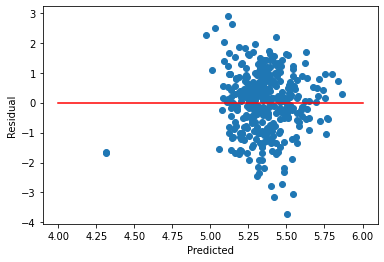

In [ ]:
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
x = np.arange(4, 7, 1)
slope = 0
intercept = 0
y = slope * x + intercept
plt.plot(x,y, color = "red")

#### Final Note 
![Correlation](correlation.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc310c6d-38f4-4996-9449-9d21f317cc9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>